<a href="https://colab.research.google.com/github/NishthaJethani/marine-life-classification/blob/main/aquatic_life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Writing app.py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_file_path = '/content/drive/MyDrive/archive.zip'

extract_to = '/content/aquatic_life_images'

# Here using zipfile library we are directly extracting the dataset.. instead of extracting on pc and uploading to drive.
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [ ]:
import os

image_directory = '/content/aquatic_life_images'

folders = os.listdir(image_directory)
print(folders) # Here we are getting the names of classes/folders in which the images of each species is divided.

['Turtle_Tortoise', 'Starfish', 'Puffers', 'Whale', 'Otter', 'Sea Rays', 'Jelly Fish', 'Squid', 'Octopus', 'Crabs', 'Sea Urchins', 'Clams', 'Penguin', 'Shrimp', 'Corals', 'Fish', 'Sharks', 'Nudibranchs', 'Seal', 'Eel', 'Lobster', 'Seahorse', 'Dolphin']


In [ ]:

fish_images = os.listdir(os.path.join(image_directory, 'Dolphin'))
print("Fish images:", fish_images)
# The names of images of dolphins that are present in Dolphin directory are displayed.

Fish images: ['Dolphin (140).jpg', '19661805932_fc7149fe8b_o.jpg', '6884906021_6a5bda6fe2_b.jpg', '6360444595_c309639cf2_o.jpg', 'Dolphin (258).jpg', '4910318783_3cd537bd2d_b.jpg', '2722053815_c003a11def_b.jpg', '5630771444_124aac6726_b.jpg', '7857435216_711e93457b_b.jpg', '7870988882_34377e6cf5_o.jpg', 'Dolphin (67).jpg', 'Dolphin (44).jpg', '6046687276_a3128448c0_b.jpg', '5356184442_2777e2936a_b.jpg', '28616790297_daebb0d721_o.jpg', '4910321843_c11d03e5b7_b.jpg', '7875143304_e7f55aafe2_o.jpg', 'Dolphin (263).jpg', 'Dolphin (19).jpg', '6942195882_4cfe172d7e_o.jpg', 'Dolphin (241).jpg', '13064706645_f595c4e7e3_o.jpg', 'Dolphin (193).jpg', 'Dolphin (33).jpg', '5231035724_887d9d9dfc_o.jpg', '18509187259_c7243c4beb_b.jpg', '5988427409_6a1cee4eae_o.jpg', '204484906_b4436a01ab_b.jpg', '12368242553_9e6a25e065_b.jpg', '10024981276_65f3d41599_b.jpg', '6105971823_6a3cf7d887_o.jpg', 'Dolphin (150).jpg', '9629735601_f893fb649b_o.jpg', '29296746446_bb1c47f9b1_o.jpg', '6962292004_d762e34102_o.jpg',

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
!pip install keras-preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.2 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback

--2024-04-25 06:33:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-25 06:33:54 (22.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from prettytable import PrettyTable
import numpy as np
import pandas as pd
import os

# for dataset splitting and shuffling
import random
import shutil

#For augmentation
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from skimage import io
from PIL import Image

#For data generators
import pathlib
import tensorflow as tf

#For convolutional neural network
import tensorflow as tf
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint


#for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

from tensorflow.keras.models import load_model



In [ ]:
def TotalImages(path):
    src = os.listdir(path)
    data = []

    for lb in src:
        x = os.path.join(path, lb)
        y = os.listdir(x)
        data.append([lb, len(y)])

    # Create the table using tabulate
    table = tabulate(data, headers=["Label", "Number of Images"], tablefmt="fancy_grid")

    # Print the table
    print(table)

In [ ]:
dataset_path = "/content/aquatic_life_images"

labels = os.listdir(dataset_path)

# Create a new PrettyTable instance
table = PrettyTable()
table.add_column("Labels", labels)

# Set table alignment
table.align = "l"
print(table)


+-----------------+
| Labels          |
+-----------------+
| Turtle_Tortoise |
| Starfish        |
| Puffers         |
| Whale           |
| Otter           |
| Sea Rays        |
| Jelly Fish      |
| Squid           |
| Octopus         |
| Crabs           |
| Sea Urchins     |
| Clams           |
| Penguin         |
| Shrimp          |
| Corals          |
| Fish            |
| Sharks          |
| Nudibranchs     |
| Seal            |
| Eel             |
| Lobster         |
| Seahorse        |
| Dolphin         |
+-----------------+


In [ ]:
labels

['Lobster',
 'Sea Rays',
 'Sharks',
 'Shrimp',
 'Clams',
 'Dolphin',
 'Corals',
 'Turtle_Tortoise',
 'Squid',
 'Octopus',
 'Eel',
 'Seahorse',
 'Whale',
 'Sea Urchins',
 'Penguin',
 'Starfish',
 'Seal',
 'Puffers',
 'Otter',
 'Nudibranchs',
 'Jelly Fish',
 'Crabs',
 'Fish']

In [ ]:
TotalImages(dataset_path)

╒═════════════════╤════════════════════╕
│ Label           │   Number of Images │
╞═════════════════╪════════════════════╡
│ Lobster         │                499 │
├─────────────────┼────────────────────┤
│ Sea Rays        │                517 │
├─────────────────┼────────────────────┤
│ Sharks          │                590 │
├─────────────────┼────────────────────┤
│ Shrimp          │                488 │
├─────────────────┼────────────────────┤
│ Clams           │                497 │
├─────────────────┼────────────────────┤
│ Dolphin         │                782 │
├─────────────────┼────────────────────┤
│ Corals          │                500 │
├─────────────────┼────────────────────┤
│ Turtle_Tortoise │               1903 │
├─────────────────┼────────────────────┤
│ Squid           │                483 │
├─────────────────┼────────────────────┤
│ Octopus         │                562 │
├─────────────────┼────────────────────┤
│ Eel             │                497 │
├───────────────

<ipython-input-130-9ce7c4a5c833>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=data, palette= "mako")


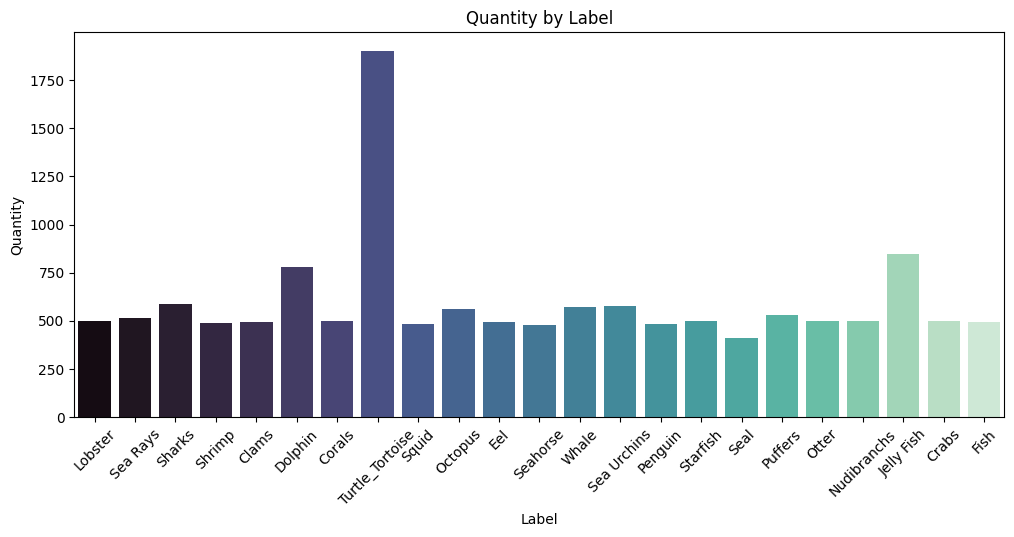

In [ ]:
src = os.listdir(dataset_path)
data = []

for lb in src:
    x = os.path.join(dataset_path, lb)
    y = os.listdir(x)
    data.append(len(y))

plt.figure(figsize=(12, 5))

sns.barplot(x=labels, y=data, palette= "mako")

# Set plot title and labels
plt.title("Quantity by Label")
plt.xlabel("Label")
plt.ylabel("Quantity")
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [ ]:
def remove_directory(directory_path):
    # Iterate over all files and directories within the directory
    for root, dirs, files in os.walk(directory_path, topdown=False):
        # Remove files
        for file in files:
            file_path = os.path.join(root, file)
            os.remove(file_path)

        # Remove subdirectories
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            shutil.rmtree(dir_path)

    # Remove the main directory itself
    shutil.rmtree(directory_path)

# Specify the path to the directory you want to remove
directory_path = '/content/working/sea-animals-image-datase'


In [ ]:
output_path = '/content'

if not os.path.exists(output_path):
    os.mkdir(os.path.join(output_path))

for label in labels:
    new_path = os.path.join(dataset_path, label)

    label_path = os.listdir(new_path)

    ims = [i for i in label_path if i.endswith(".jpg")]

    random.shuffle(ims)
    split_size = 0.8
    train_len = int(len(ims) * split_size)
    train_ims = ims[:train_len]
    val_ims = ims[train_len:]

    # create train and val dirs
    train_path = os.path.join(output_path, "train")
    label_train_path = os.path.join(train_path, label)

    val_path = os.path.join(output_path, "val")
    label_val_path = os.path.join(val_path, label)

    if not os.path.exists(train_path):
        os.mkdir(train_path)

    if not os.path.exists(label_train_path):
        os.mkdir(label_train_path)

    if not os.path.exists(val_path):
        os.mkdir(val_path)

    if not os.path.exists(label_val_path):
        os.mkdir(label_val_path)


    for im in train_ims:
        shutil.copy(os.path.join(new_path, im), label_train_path)

    for im in val_ims:
        shutil.copy(os.path.join(new_path, im), label_val_path)

In [ ]:
train_path = "/content/train"
TotalImages(train_path)

╒═════════════════╤════════════════════╕
│ Label           │   Number of Images │
╞═════════════════╪════════════════════╡
│ Lobster         │                398 │
├─────────────────┼────────────────────┤
│ Sea Rays        │                413 │
├─────────────────┼────────────────────┤
│ Sharks          │                469 │
├─────────────────┼────────────────────┤
│ Shrimp          │                390 │
├─────────────────┼────────────────────┤
│ Clams           │                397 │
├─────────────────┼────────────────────┤
│ Dolphin         │                619 │
├─────────────────┼────────────────────┤
│ Corals          │                398 │
├─────────────────┼────────────────────┤
│ Turtle_Tortoise │               1518 │
├─────────────────┼────────────────────┤
│ Squid           │                384 │
├─────────────────┼────────────────────┤
│ Octopus         │                448 │
├─────────────────┼────────────────────┤
│ Eel             │                396 │
├───────────────

In [ ]:
val_path = "/content/val"
TotalImages(val_path)

╒═════════════════╤════════════════════╕
│ Label           │   Number of Images │
╞═════════════════╪════════════════════╡
│ Lobster         │                100 │
├─────────────────┼────────────────────┤
│ Sea Rays        │                104 │
├─────────────────┼────────────────────┤
│ Sharks          │                118 │
├─────────────────┼────────────────────┤
│ Shrimp          │                 98 │
├─────────────────┼────────────────────┤
│ Clams           │                100 │
├─────────────────┼────────────────────┤
│ Dolphin         │                155 │
├─────────────────┼────────────────────┤
│ Corals          │                100 │
├─────────────────┼────────────────────┤
│ Turtle_Tortoise │                380 │
├─────────────────┼────────────────────┤
│ Squid           │                 96 │
├─────────────────┼────────────────────┤
│ Octopus         │                113 │
├─────────────────┼────────────────────┤
│ Eel             │                100 │
├───────────────

In [ ]:
TARGET_SIZE = (224, 224)

In [ ]:
datagen = ImageDataGenerator(
            width_shift_range=0.2,
            height_shift_range=0.2,
            brightness_range = (0.3, 0.9),
            zoom_range=0.2)

In [ ]:
def Augmentation(path, capacity):
    for label in labels:
        if label == 'Turtle_Tortoise':
            continue

        image_directory = path + '/' + label + '/'
        SIZE = TARGET_SIZE[0]
        dataset = []

        print(image_directory)
        my_images = os.listdir(image_directory)
        for i, image_name in enumerate(my_images):
            if ((image_name.split('.')[1] == 'jpg')):
                image = load_img(image_directory + image_name, target_size = TARGET_SIZE)
                image = img_to_array(image)
                dataset.append(image)

        x = np.array(dataset)
        i = 0
        for batch in datagen.flow(x, batch_size=16,
                                save_to_dir= train_path + '/' + label + '/',
                                save_prefix='aug',
                                save_format='jpg'):
            i += 1
            if i > capacity:
              break

In [ ]:
Augmentation(train_path, 50)
Augmentation(val_path, 50)

/content/train/Lobster/
/content/train/Sea Rays/
/content/train/Sharks/
/content/train/Shrimp/
/content/train/Clams/
/content/train/Dolphin/
/content/train/Corals/
/content/train/Squid/
/content/train/Octopus/
/content/train/Eel/
/content/train/Seahorse/
/content/train/Whale/
/content/train/Sea Urchins/
/content/train/Penguin/
/content/train/Starfish/
/content/train/Seal/
/content/train/Puffers/
/content/train/Otter/
/content/train/Nudibranchs/
/content/train/Jelly Fish/
/content/train/Crabs/
/content/train/Fish/
/content/val/Lobster/
/content/val/Sea Rays/
/content/val/Sharks/
/content/val/Shrimp/
/content/val/Clams/
/content/val/Dolphin/
/content/val/Corals/
/content/val/Squid/
/content/val/Octopus/
/content/val/Eel/
/content/val/Seahorse/
/content/val/Whale/
/content/val/Sea Urchins/
/content/val/Penguin/
/content/val/Starfish/
/content/val/Seal/
/content/val/Puffers/
/content/val/Otter/
/content/val/Nudibranchs/
/content/val/Jelly Fish/
/content/val/Crabs/
/content/val/Fish/


In [ ]:
TotalImages(train_path)

╒═════════════════╤════════════════════╕
│ Label           │   Number of Images │
╞═════════════════╪════════════════════╡
│ Lobster         │               1941 │
├─────────────────┼────────────────────┤
│ Sea Rays        │               1986 │
├─────────────────┼────────────────────┤
│ Sharks          │               2029 │
├─────────────────┼────────────────────┤
│ Shrimp          │               1904 │
├─────────────────┼────────────────────┤
│ Clams           │               1939 │
├─────────────────┼────────────────────┤
│ Dolphin         │               2221 │
├─────────────────┼────────────────────┤
│ Corals          │               1940 │
├─────────────────┼────────────────────┤
│ Turtle_Tortoise │               1518 │
├─────────────────┼────────────────────┤
│ Squid           │               2016 │
├─────────────────┼────────────────────┤
│ Octopus         │               1990 │
├─────────────────┼────────────────────┤
│ Eel             │               1936 │
├───────────────

In [ ]:
TotalImages(val_path)

╒═════════════════╤════════════════════╕
│ Label           │   Number of Images │
╞═════════════════╪════════════════════╡
│ Lobster         │                100 │
├─────────────────┼────────────────────┤
│ Sea Rays        │                104 │
├─────────────────┼────────────────────┤
│ Sharks          │                118 │
├─────────────────┼────────────────────┤
│ Shrimp          │                 98 │
├─────────────────┼────────────────────┤
│ Clams           │                100 │
├─────────────────┼────────────────────┤
│ Dolphin         │                155 │
├─────────────────┼────────────────────┤
│ Corals          │                100 │
├─────────────────┼────────────────────┤
│ Turtle_Tortoise │                380 │
├─────────────────┼────────────────────┤
│ Squid           │                 96 │
├─────────────────┼────────────────────┤
│ Octopus         │                113 │
├─────────────────┼────────────────────┤
│ Eel             │                100 │
├───────────────

In [ ]:
train_dataset_url = train_path
train_data_dir = pathlib.Path(train_dataset_url)

validation_dataset_url = val_path
validation_data_dir = pathlib.Path(validation_dataset_url)

img_height,img_width= TARGET_SIZE
batch_size=64

#Train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  validation_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 45135 files belonging to 23 classes.
Found 2743 files belonging to 23 classes.


In [ ]:
def plot_images(dataset):
    plt.figure(figsize=(6,6))

    for images, labels in train_ds.take(1):
        for i in range(6):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.axis("off")


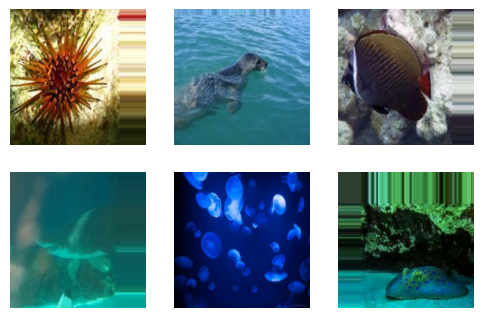

In [ ]:
plot_images(train_ds)

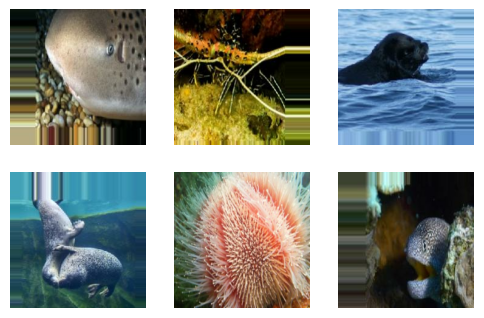

In [ ]:
plot_images(val_ds)

In [ ]:
model = Sequential([
    layers.Conv2D(64, (5,5), activation='relu', padding= 'valid', input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    BatchNormalization(),

    layers.Conv2D(128, (5,5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    BatchNormalization(),

    layers.Conv2D(256, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    BatchNormalization(),

    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.2),
    BatchNormalization(),

    layers.Conv2D(1024, (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(labels), activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 batch_normalization (Batch  (None, 110, 110, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 128)     204928    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 128)       0

In [ ]:
checkpoint_path = "animals_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [ ]:
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    steps_per_epoch=len(train_ds),
    validation_data=val_ds,
    validation_steps=len(val_ds),

    epochs=5,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs",
                                    "animal_classification"),
        checkpoint_callback,
    ]
)

Saving TensorBoard log files to: training_logs/animal_classification/20240418-144629
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


706/706 [==============================] - 353s 470ms/step - loss: 2.9895 - accuracy: 0.2033 - val_loss: 2.4972 - val_accuracy: 0.2472
Epoch 2/5
706/706 [==============================] - 321s 454ms/step - loss: 2.3259 - accuracy: 0.2852 - val_loss: 2.2187 - val_accuracy: 0.3146
Epoch 3/5
706/706 [==============================] - 317s 448ms/step - loss: 2.1581 - accuracy: 0.3337 - val_loss: 3.3839 - val_accuracy: 0.1174
Epoch 4/5
706/706 [==============================] - 319s 451ms/step - loss: 2.0042 - accuracy: 0.3791 - val_loss: 1.7390 - val_accuracy: 0.4801
Epoch 5/5
706/706 [==============================] - 318s 449ms/step - loss: 1.8508 - accuracy: 0.4254 - val_loss: 1.6690 - val_accuracy: 0.4889


In [ ]:
model.save('/content/drive/MyDrive/model_5_42.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model


model = load_model('/content/drive/MyDrive/model_5_42.h5')



In [ ]:
# Resume training from the loaded checkpoint
history = model.fit(
    train_ds,
    steps_per_epoch=len(train_ds),
    validation_data=val_ds,
    validation_steps=len(val_ds),

    epochs=5,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs",
                                    "animal_classification"),
        checkpoint_callback,
    ]
)

Saving TensorBoard log files to: training_logs/animal_classification/20240418-151728
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


706/706 [==============================] - 327s 456ms/step - loss: 1.6820 - accuracy: 0.4746 - val_loss: 1.5068 - val_accuracy: 0.5443
Epoch 2/5
706/706 [==============================] - 319s 452ms/step - loss: 1.5048 - accuracy: 0.5281 - val_loss: 1.4687 - val_accuracy: 0.5425
Epoch 3/5
706/706 [==============================] - 318s 449ms/step - loss: 1.3141 - accuracy: 0.5855 - val_loss: 1.3875 - val_accuracy: 0.5778
Epoch 4/5
706/706 [==============================] - 320s 453ms/step - loss: 1.1058 - accuracy: 0.6472 - val_loss: 1.0172 - val_accuracy: 0.6916
Epoch 5/5
706/706 [==============================] - 319s 452ms/step - loss: 0.9078 - accuracy: 0.7096 - val_loss: 0.8947 - val_accuracy: 0.7306


In [ ]:
model.save('/content/drive/MyDrive/model_10_70.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = load_model('/content/drive/MyDrive/model_10_70.h5')

In [ ]:
# Resume training from the loaded checkpoint
history = model.fit(
    train_ds,
    steps_per_epoch=len(train_ds),
    validation_data=val_ds,
    validation_steps=len(val_ds),

    epochs=5,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs",
                                    "animal_classification"),
        checkpoint_callback,
    ]
)

Saving TensorBoard log files to: training_logs/animal_classification/20240418-154929
Epoch 1/5
706/706 [==============================] - 323s 452ms/step - loss: 0.7311 - accuracy: 0.7640 - val_loss: 0.8935 - val_accuracy: 0.7444
Epoch 2/5
706/706 [==============================] - 320s 452ms/step - loss: 0.5915 - accuracy: 0.8084 - val_loss: 0.7973 - val_accuracy: 0.7747
Epoch 3/5
706/706 [==============================] - 320s 453ms/step - loss: 0.4860 - accuracy: 0.8403 - val_loss: 0.7205 - val_accuracy: 0.8115
Epoch 4/5
706/706 [==============================] - 318s 450ms/step - loss: 0.3968 - accuracy: 0.8707 - val_loss: 0.6817 - val_accuracy: 0.8174
Epoch 5/5
706/706 [==============================] - 320s 452ms/step - loss: 0.3498 - accuracy: 0.8872 - val_loss: 0.7933 - val_accuracy: 0.8108


In [ ]:
model.save('/content/drive/MyDrive/model_15_88.h5')

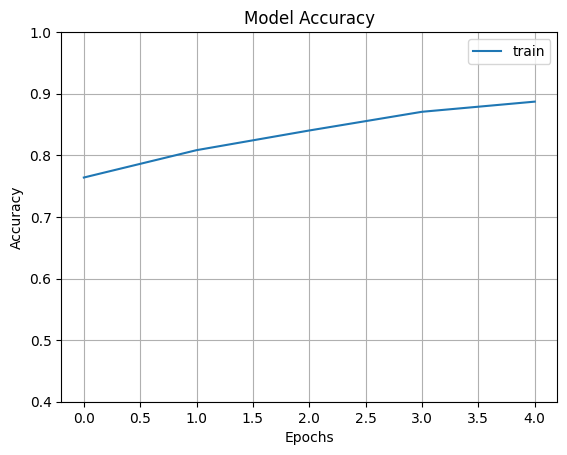

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train'])
plt.show()

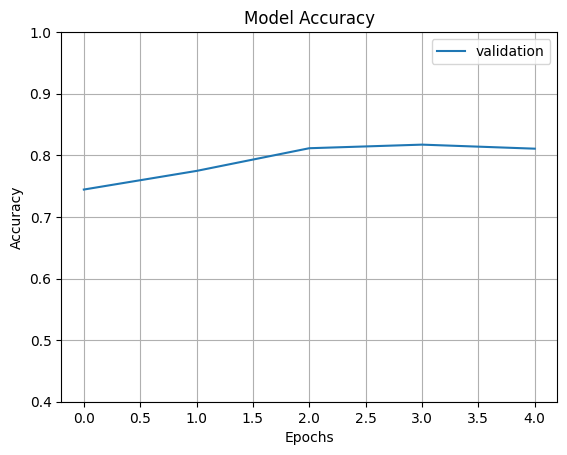

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['validation'])
plt.show()

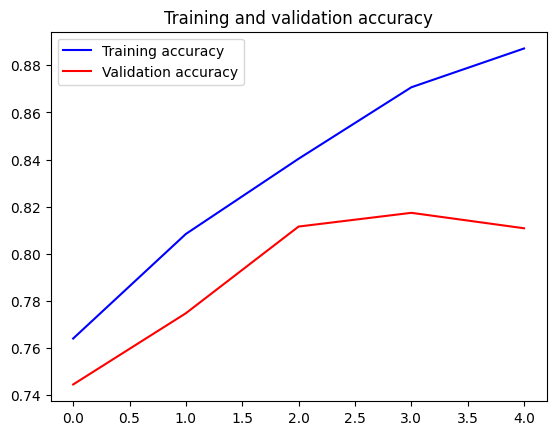

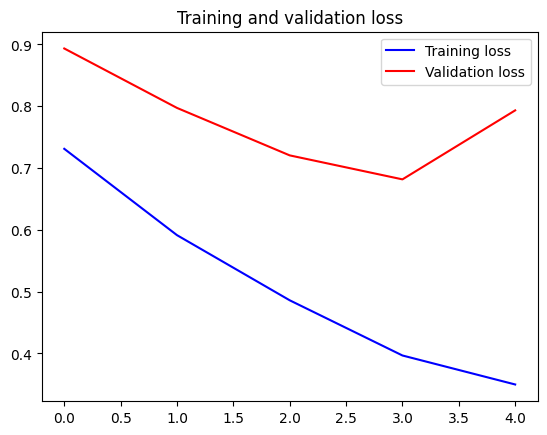

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model = load_model('/content/drive/MyDrive/model_15_88.h5')

In [ ]:
sorted_labels = sorted(labels)

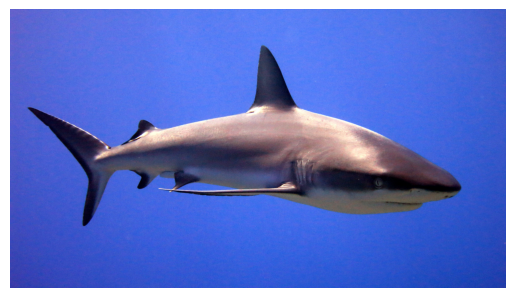

1/1 [==============================] - 1s 672ms/step


'Sharks'

In [ ]:
img_path = '/content/Corl0207_(28225976491).jpg'

img_show = mpimg.imread(img_path)
plt.imshow(img_show)
plt.axis('off')
plt.show()

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

predicted_label = sorted_labels[predicted_class]

predicted_label

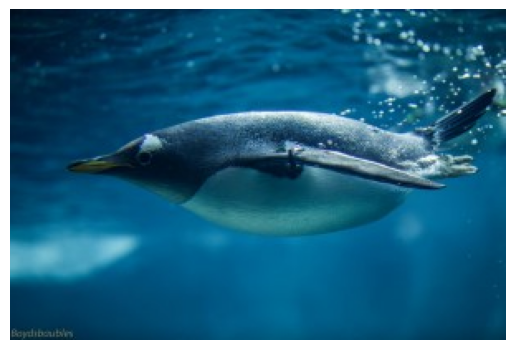

1/1 [==============================] - 0s 48ms/step


'Penguin'

In [ ]:
img_path = '/content/3219c4d4-0b5f-4f13-8eb9-7479fbb77cf2.jpeg'

img_show = mpimg.imread(img_path)
plt.imshow(img_show)
plt.axis('off')
plt.show()

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

predicted_label = sorted_labels[predicted_class]

predicted_label

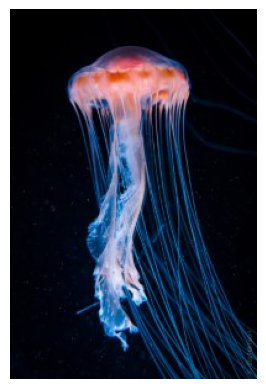

1/1 [==============================] - 0s 25ms/step


'Jelly Fish'

In [ ]:
img_path = '/content/4c438e79-13ab-4872-a92c-02d8b4cdb124.jpeg'

img_show = mpimg.imread(img_path)
plt.imshow(img_show)
plt.axis('off')
plt.show()

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

predicted_label = sorted_labels[predicted_class]

predicted_label

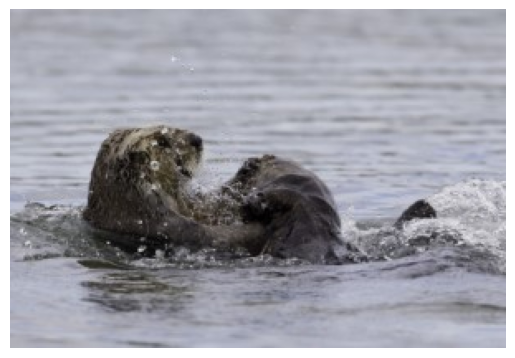

1/1 [==============================] - 0s 90ms/step


'Otter'

In [ ]:
img_path = '/content/a452ccc8-b5fa-4df1-bc81-b2a1583ec2fe.jpeg'

img_show = mpimg.imread(img_path)
plt.imshow(img_show)
plt.axis('off')
plt.show()

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

predicted_label = sorted_labels[predicted_class]

predicted_label

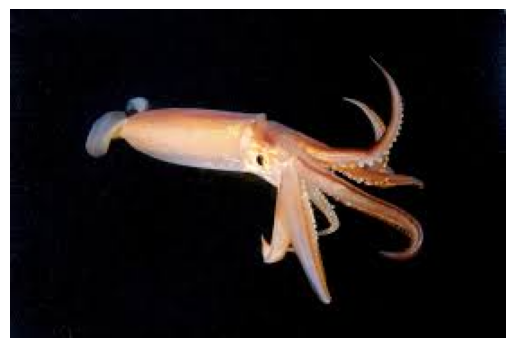

1/1 [==============================] - 0s 101ms/step


'Squid'

In [ ]:
img_path = '/content/download (1).jpeg'

img_show = mpimg.imread(img_path)
plt.imshow(img_show)
plt.axis('off')
plt.show()

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

predicted_label = sorted_labels[predicted_class]

predicted_label

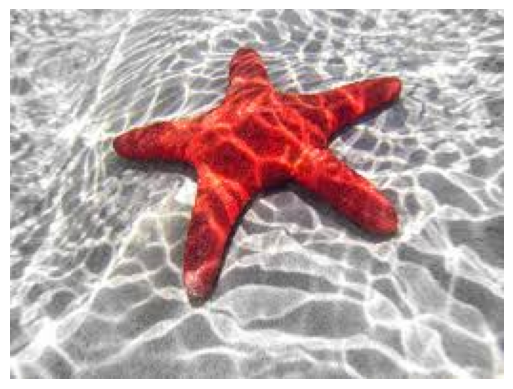

1/1 [==============================] - 0s 58ms/step


'Starfish'

In [ ]:
img_path = '/content/download (3).jpeg'

img_show = mpimg.imread(img_path)
plt.imshow(img_show)
plt.axis('off')
plt.show()

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

predicted_label = sorted_labels[predicted_class]

predicted_label

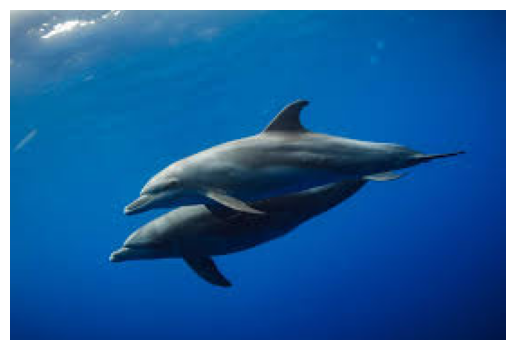

1/1 [==============================] - 0s 93ms/step


'Dolphin'

In [ ]:
img_path = '/content/download.jpeg'

img_show = mpimg.imread(img_path)
plt.imshow(img_show)
plt.axis('off')
plt.show()

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

predicted_label = sorted_labels[predicted_class]

predicted_label

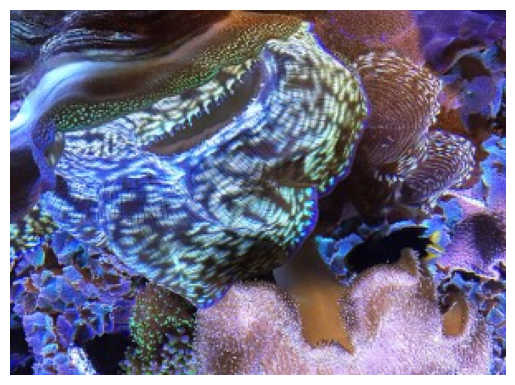

1/1 [==============================] - 0s 52ms/step


'Clams'

In [ ]:
img_path = '/content/e7614ff8-3dec-4e6d-9d02-77d9ad705c45.jpeg'

img_show = mpimg.imread(img_path)
plt.imshow(img_show)
plt.axis('off')
plt.show()

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

predicted_label = sorted_labels[predicted_class]

predicted_label